jupyter nbconvert 4_association.ipynb --to script

cd /data01/ch6845/MHC*;screen -S assoc;for i in {0..10};do python 4_association.py $i;done


Rscript OmnibusTest_BHv5_modified.R logistic data/out_assoc/allergic_disease/step_02.omnibus data/genotype/4_merge/KCHIP_HLA_SNP_1000G_merged.fam data/out_assoc/allergic_disease/step_02.aa data/out_assoc/allergic_disease/phenotype.pheomnibus pheno data/out_assoc/allergic_disease/step_02.omnibus.covar header0 NA

for i in {0..10};do echo $i;done

for i in {0..10};do python 4_association.py binary $i;done
for i in {11..20};do python 4_association.py binary $i;done
for i in {21..30};do python 4_association.py binary $i;done
for i in {31..40};do python 4_association.py binary $i;done
for i in {41..47};do python 4_association.py binary $i;done


In [1]:
import os
import sys

import re
import pathlib

import numpy as np
import pandas as pd

from pyplink import PyPlink

from basic_tools import *

In [2]:
final_aa_path,final_plink_path

('data/genotype/4_merge/KCHIP_HLA.hg18.intersection_HAN.LABELED.NoSameAllele.bMarkers.2field.saveRareAllele.beagle5.1.AGM.bgl.phased.QC.aa',
 'data/genotype/4_merge/KCHIP_HLA_SNP_1000G_merged')

In [3]:
plink_path=final_plink_path
aa_path=final_aa_path

In [5]:
#fam=pd.read_csv(plink_path+'.fam',sep=' ',header=None,names=['FID','IID','FID1','FID2','SEX','PHE'])
#fam

In [48]:
plink=PyPlink(plink_path)
fam=plink.get_fam().astype({'fid':str,'iid':str}).rename(columns={'fid':'FID','iid':'IID'})
bim=plink.get_bim()

In [7]:
f=open(aa_path,'r');aa_ind=f.readline().strip().split(' ')[2:];f.close()

In [8]:
aa_ind_1=[aa_ind[i] for i in range(0,len(aa_ind),2)]
aa_ind_2=[aa_ind[i+1] for i in range(0,len(aa_ind),2)]

In [9]:
#aa_ind_1

In [10]:
assert (fam['IID']!=aa_ind_1).sum()==0
assert (fam['IID']!=aa_ind_2).sum()==0

# Phenotype define

In [27]:
phenotypes=pd.read_csv(pheno_all_file_path,sep='\t')
'  '.join(phenotypes.columns)

'ID  age  sex  asthma  chronic_bronchitis  allergic_disease  stomach_cancer  liver_cancer  colorectal_cancer  breast_cancer  cervical_cancer  lung_cancer  thyroid_cancer  prostate_cancer  bladder_cancer  colon_polyps  angina_pectoris_myocardial_infarction  hypertension  stroke  transient_ischemic_attacks  acute_liver_disease  diabetes  hyperlipidemia  thyroid_disease  arthritis  rheumatoid_arthritis  osteoporosis  parkinson  pwi_total  chronic_gastritis_stomach_ulcer  duodenal_ulcer  urinary_tract_infection  height  hip_circumference  waist_circumference  weight  systolic_blood_pressure  diastolic_blood_pressure  pulse  hysterectomy  menarche_onset_age  menopause_age  menopause_cycle  ovarian_extraction  child_delivery_number  big_baby  small_baby  child_present  child_dead  hematocrit  hemoglobin  platelet  rbc  wbc  mcv  mch  mchc  total_bilirubin  bun  creatinine  blood_in_urine  glucose_in_urine  alt  ast  gtp  total_cholesterol  hdl_cholesterol  hba1c  freet4  tsh  triglyceride  a

In [28]:
phenotypes=phenotypes.set_index('ID').loc[fam.IID]
phenotypes.shape

(125673, 137)

In [29]:
assert (phenotypes.index!=fam['IID']).sum()==0

In [68]:
#phenotypes['acute_liver_disease'].value_counts().index

In [195]:
#len(continuous_traits)

55

In [133]:
binary_traits=phenotypes.columns[phenotypes.apply(lambda x: (not 'x_ray' in x.name) & ((x.value_counts().index!=2).sum()==0),axis=0)]
#binary_traits.sort_values(ascending=False)
binary_traits

Index(['asthma', 'chronic_bronchitis', 'allergic_disease', 'stomach_cancer',
       'liver_cancer', 'colorectal_cancer', 'breast_cancer', 'cervical_cancer',
       'lung_cancer', 'thyroid_cancer', 'prostate_cancer', 'bladder_cancer',
       'colon_polyps', 'angina_pectoris_myocardial_infarction', 'hypertension',
       'stroke', 'transient_ischemic_attacks', 'acute_liver_disease',
       'diabetes', 'hyperlipidemia', 'thyroid_disease', 'arthritis',
       'rheumatoid_arthritis', 'osteoporosis', 'parkinson',
       'chronic_gastritis_stomach_ulcer', 'duodenal_ulcer',
       'urinary_tract_infection', 'hysterectomy', 'ovarian_extraction',
       'big_baby', 'small_baby', 'heart_failure',
       'peripheral_vascular_diseases', 'cataract', 'glaucoma', 'renal_failure',
       'fatty_liver', 'copd', 'tuberculosis', 'benign_prostatic_hyperplasia',
       'gout', 'fracture', 'cholelithiasis_cholecystitis',
       'periodontal_disease', 'insomnia', 'neurosis'],
      dtype='object')

In [132]:
continuous_traits=phenotypes.columns[phenotypes.apply(lambda x: (not 'x_ray' in x.name) & ((x.value_counts().index!=2).sum()!=0),axis=0)]
continuous_traits

Index(['age', 'sex', 'pwi_total', 'height', 'hip_circumference',
       'waist_circumference', 'weight', 'systolic_blood_pressure',
       'diastolic_blood_pressure', 'pulse', 'menarche_onset_age',
       'menopause_age', 'menopause_cycle', 'child_delivery_number',
       'child_present', 'child_dead', 'hematocrit', 'hemoglobin', 'platelet',
       'rbc', 'wbc', 'mcv', 'mch', 'mchc', 'total_bilirubin', 'bun',
       'creatinine', 'blood_in_urine', 'glucose_in_urine', 'alt', 'ast', 'gtp',
       'total_cholesterol', 'hdl_cholesterol', 'hba1c', 'freet4', 'tsh',
       'triglyceride', 'albumin', 'hscrp', 'protein_in_urine', 'renin',
       'sleep_duration', 'grip_strength', 'ALP', 'FVC_predicted',
       'FEV_predicted', 'FEV_over_FVC_predicted', 'MVV_predicted',
       'bone_density_distal_sos', 'bone_density_midshaft_sos',
       'protein_in_blood', 'glucose_in_blood', 'cohort', 'bmi'],
      dtype='object')

In [223]:
if 'ipykernel' in sys.argv[0]:
    ipykernel=True
    #phenotype_name='asthma'
    phenotype_type='continuous';phenotype_name='waist_circumference'
    #phenotype_type='binary';phenotype_name='asthma'
    
else:
    ipykernel=False
    phenotype_type=sys.argv[1]
    phenotype_name=sys.argv[2]
    if phenotype_type=='binary':
        try:
            phenotype_name=int(phenotype_name)
            phenotype_name=binary_traits[phenotype_name]
        except:
            pass        
    elif phenotype_type=='continuous':
        try:
            phenotype_name=int(phenotype_name)
            phenotype_name=continuous_traits[phenotype_name]
        except:
            pass 
    else:
        raise
print(phenotype_type,phenotype_name)

continuous waist_circumference


In [224]:
#phenotype_define=pd.Series(np.nan,phenotypes.index)


----------------------
cohort: 1,  7600/ 7607 (99.908%)
Total values: 7600
----------------------
cohort: 2, 98935/99159 (99.774%)
Total values: 106535
----------------------
cohort: 3, 18607/18907 (98.413%)
Total values: 125142
median:81.500, mean: 81.611, std: 8.734, max: 145.000, min: 31.000
>mean+3std:334, <mean-3std:35
Total values: 124772


/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in greater
/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in less
/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in greater
/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in less


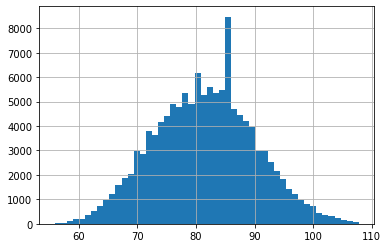

In [225]:
phenotype_define=np.full(len(phenotypes.index),np.nan)

if phenotype_type=='binary':
    for cohort in sorted(phenotypes['cohort'].unique()):
        print('----------------------')
        cohort_check=(phenotypes['cohort']==cohort)
        cohort_case_check=(phenotypes['cohort']==cohort)&(phenotypes[phenotype_name]==2)
        cohort_control_check=(phenotypes['cohort']==cohort)&(~(phenotypes[phenotype_name]==2))
        print('cohort: {}, {:5d}/{:5d} ({:.3f}%)'.format(cohort,cohort_case_check.sum(),cohort_check.sum(),100*cohort_case_check.sum()/cohort_check.sum()))

        if cohort_case_check.sum()>0:
            phenotype_define[cohort_case_check]=2
            phenotype_define[cohort_control_check]=1
        elif np.isnan(cohort):
            raise
            cohort_check_temp=(phenotypes['cohort'].isnull())
            phenotype_define[cohort_check_temp]=-9
            print('missing individuals founded: {}'.format(cohort_check_temp.sum()))
        else:
            print('cohort {} ignored. it may due to nonexistence of questionnaire'.format(cohort))

        print('Total case:',(phenotype_define==2).sum())
    print(print("phenotype defined\n",pd.Series(phenotype_define).value_counts()))
    
elif phenotype_type=='continuous':
    for cohort in sorted(phenotypes['cohort'].unique()):
        print('----------------------')
        cohort_check=(phenotypes['cohort']==cohort)
        cohort_notnull_check=(phenotypes['cohort']==cohort)&(~(phenotypes[phenotype_name].isnull()))
        #print(cohort_notnull_check,type(cohort_notnull_check))
        print('cohort: {}, {:5d}/{:5d} ({:.3f}%)'.format(cohort,cohort_notnull_check.sum(),cohort_check.sum(),100*cohort_notnull_check.sum()/cohort_check.sum()))

        if cohort_notnull_check.sum()>0:
            phenotype_define[cohort_notnull_check]=phenotypes[phenotype_name][cohort_notnull_check]
        elif np.isnan(cohort):
            raise
            cohort_check_temp=(phenotypes['cohort'].isnull())
            phenotype_define[cohort_check_temp]=-9
            print('missing individuals founded: {}'.format(cohort_check_temp.sum()))
        else:
            print('cohort {} ignored. it may due to nonexistence of questionnaire'.format(cohort))

        print('Total values:',(~np.isnan(phenotype_define)).sum())
        
    print("median:{:.3f}, mean: {:.3f}, std: {:.3f}, max: {:.3f}, min: {:.3f}".format(pd.Series(phenotype_define).median(),
                                                         pd.Series(phenotype_define).mean(),
                                                         pd.Series(phenotype_define).std(),
                                                         pd.Series(phenotype_define).max(),
                                                         pd.Series(phenotype_define).min()
                                                        )
         )
    print(">mean+3std:{}, <mean-3std:{}".format((phenotype_define>pd.Series(phenotype_define).mean()+3*pd.Series(phenotype_define).std()).sum(),
                                                (phenotype_define<pd.Series(phenotype_define).mean()-3*pd.Series(phenotype_define).std()).sum()
                                               )
         )
    phenotype_define[phenotype_define>pd.Series(phenotype_define).mean()+3*pd.Series(phenotype_define).std()]=np.nan
    phenotype_define[phenotype_define<pd.Series(phenotype_define).mean()-3*pd.Series(phenotype_define).std()]=np.nan
    
    print('Total values:',(~np.isnan(phenotype_define)).sum())                                                    
    pd.Series(phenotype_define).hist(bins=50)

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6708789/
    
age, gender, race, diabetes, hyperlipidemia, hypertension, and all significant alleles.



phenotypes[]
union 
* diabetes
* hyperlipidemia
* hypertension
* allergic_disease
* colon polyps

-> unhealthy individuals -> if overlap with case-> set as missing

In [226]:
if phenotype_type=='binary':
    unhealthy_individuals=(phenotypes['diabetes']==2)|\
                            (phenotypes['hyperlipidemia']==2)|\
                            (phenotypes['hypertension']==2)|\
                            (phenotypes['allergic_disease']==2)|\
                            (phenotypes['colon_polyps']==2)|\
                            (phenotypes['rheumatoid_arthritis']==2)
    print("unhealthy individuals",unhealthy_individuals.sum())
    print("unhealthy individuals among cases",((phenotype_define==1) & (unhealthy_individuals)).sum(),"-> removed")
    phenotype_define[(phenotype_define==1) & (unhealthy_individuals)]=np.nan
    ## change to np.nan and test!!
    print("phenotype defined\n",pd.Series(phenotype_define).value_counts())

In [227]:
data_out_assoc_phenotype_path=data_out_assoc_path+phenotype_name+'/'
pathlib.Path(data_out_assoc_phenotype_path).mkdir(parents=True, exist_ok=True)

In [228]:
phenotype_define_df=pd.DataFrame(phenotype_define,index=phenotypes.index)

phenotype_define_df=phenotype_define_df.loc[fam['IID']].fillna(-9)

if phenotype_name in binary_traits:
    phenotype_define_df=phenotype_define_df.astype(int)
    
phenotype_define_df_noindex=phenotype_define_df.reset_index().rename(columns={0:'pheno'})

phenotype_define_df_noindex[[phenotype_define_df_noindex.columns[0],phenotype_define_df_noindex.columns[0],phenotype_define_df_noindex.columns[1]]].to_csv(data_out_assoc_phenotype_path+'phenotype.phe',index=None,header=None,sep='\t')
#phenotype_define_df_noindex[[phenotype_define_df_noindex.columns[0],phenotype_define_df_noindex.columns[0],phenotype_define_df_noindex.columns[1]]].to_csv(data_out_assoc_phenotype_path+'phenotype.pheomnibus',index=None,sep='\t')

In [229]:
phenotype_define_df_noindex.shape

(125673, 2)

In [230]:
assert (phenotype_define_df_noindex['pheno']==np.nan).sum()==0
if phenotype_type=='binary':
    print(phenotype_define_df_noindex['pheno'].value_counts())
elif phenotype_type=='continuous':
    print(phenotype_define_df_noindex['pheno'].value_counts().iloc[:5])
    print("--")
    print(phenotype_define_df_noindex['pheno'].value_counts().iloc[-5:])
else:
    raise

80.0    4334
82.0    3893
84.0    3746
78.0    3719
83.0    3617
Name: pheno, dtype: int64
--
57.10    1
76.96    1
58.60    1
56.90    1
58.90    1
Name: pheno, dtype: int64


# Association

In [231]:
#os.system(("head -n5 {} | awk '{{print "+','.join(['$'+str(i) for i in range(1,300+2+1)])+"}}'> {}").format(bmarker_aa_path,data_out_assoc_phenotype_path+'step_{:02d}.aa'.format(1)))
#os.system("grep ' AA_' {} | awk '{{print "+','.join(['$'+str(i) for i in range(1,300+2+1)])+"}}'>> {}".format(bmarker_aa_path,data_out_assoc_phenotype_path+'step_{:02d}.aa'.format(1)))
#!head -n{150+1} {data_out_assoc_phenotype_path+'phenotype.pheomnibus'} > {data_out_assoc_phenotype_path+'phenotype_test.pheomnibus'}
#!head -n{150} {data_out_assoc_phenotype_path+'phenotype.phe'} > {data_out_assoc_phenotype_path+'phenotype_test.phe'}
#!head -n{150} {bmarker_plink_path+'.fam'} > {bmarker_plink_path+'_test.fam'}

https://stackoverflow.com/questions/24369307/r-read-table-extremely-slow
https://csgillespie.github.io/efficientR/5-3-importing-data.html
https://m.blog.naver.com/PostView.nhn?blogId=urimee_e&logNo=220668022907&proxyReferer=https%3A%2F%2Fwww.google.com%2F

Rscript OmnibusTest_BHv5_modified.R logistic data/out_assoc/asthma/step_00.omnibus data/genotype/3_bmarkerphased/KCHIP_HLA.hg18.intersection_HAN.LABELED.NoSameAllele.bMarkers.2field.saveRareAllele_test.fam data/out_assoc/asthma/genotype_test.aa data/out_assoc/asthma/phenotype.pheomnibus pheno - - NA

Rscript OmnibusTest_BHv5.R logistic data/out_assoc/asthma/step_00.omnibus data/genotype/3_bmarkerphased/KCHIP_HLA.hg18.intersection_HAN.LABELED.NoSameAllele.bMarkers.2field.saveRareAllele_test.fam data/out_assoc/asthma/genotype_test.aa data/out_assoc/asthma/phenotype.pheomnibus pheno - - NA

In [232]:
def parse_plink_assoc(file_name):
    with open(file_name,'r') as f:
        lines=f.readlines()
        #lines=[line.strip().split(' ') for line in lines]
        header=re.split('\s+',lines[0].strip())
        lines=[re.split('\s+',line.strip()) for line in lines[1:]]
    #return pd.DataFrame(lines,columns=header).replace('NA',np.nan).astype({'BP':int,'A1':str,'A2':str,'F_A':float,'F_U':float,'P':float,'OR':float})
    ret=pd.DataFrame(lines,columns=header).replace('NA',np.nan)
    if file_name.split('.')[-1]=='assoc':
        return ret.astype({'BP':int,'A1':str,'A2':str,'F_A':float,'F_U':float,'P':float,'OR':float})
    elif file_name.split('.')[-1]=='qassoc':
        return ret.astype({'CHR':int,'SNP':str,'BP':int,'NMISS':int,'BETA':float,'SE':float,'R2':float,'T':float,'P':float})     
    elif file_name.split('.')[-1]=='logistic':
        return ret.astype({'CHR':int,'SNP':str,'BP':int,'A1':str,'NMISS':int,'OR':float,'STAT':float,'P':float})        
    elif file_name.split('.')[-1]=='linear':
        return ret.astype({'CHR':int,'SNP':str,'BP':int,'A1':str,'NMISS':int,'BETA':float,'STAT':float,'P':float})        
    else:
        raise

# SNP         BP    NMISS       BETA         SE         R2        T            P    
    #.astype({'BP':int,'A1':str,'A2':str,'F_A':float,'F_U':float,'P':float,'OR':float})

In [233]:
#[covariate_plink.columns[0],covariate_plink.columns[0]]+covariate_plink.columns[1:].values.tolist()

In [188]:
AA_DRB1_30

In [201]:
conditional_variant='AA_DRB1_30'

os.system('rm temp/temp.aa');os.system('grep "{} " {} > temp/temp.aa'.format(conditional_variant.replace('*','\*'),aa_path));

In [203]:
f=open('temp/temp.aa','r');lines=f.readlines();f.close();os.system('rm temp/temp.aa')

0

In [209]:
pd.Series(aa_call_list).value_counts(),len(aa_call_list)/2

(Y     172587
 G      24685
 H      19512
 L      15240
 C      15226
 R       4068
 NA        28
 dtype: int64, 125673.0)

In [202]:
'grep "{} " {} > temp/temp.aa'.format(conditional_variant.replace('*','\*'),aa_path)

'grep "AA_DRB1_30 " data/genotype/4_merge/KCHIP_HLA.hg18.intersection_HAN.LABELED.NoSameAllele.bMarkers.2field.saveRareAllele.beagle5.1.AGM.bgl.phased.QC.aa > temp/temp.aa'

In [204]:
marker_name=lines[0].split(' ')[1]
assert marker_name==conditional_variant;assert len(lines)==1
aa_call_list=np.array(lines[0].strip().split(' ')[2:])
aa_call_list_group=np.array([(aa_call_list[i],aa_call_list[i+1]) for i in range(0,len(aa_call_list),2)])

In [ ]:
conditional_variant_list=[('omnibus','AA_DRB1_30')] #save peak variants for each step

for idx in range(2,10+1):
    print("############################################  STEP {}  ############################################".format(idx))
    print("##########################  STEP {}-1 Prepare input (covar,cond,etc.)  ###################################".format(idx))
    #Initialize *.aa
    os.system('rm {}'.format(data_out_assoc_phenotype_path+'step_{:02d}*'.format(idx)))
    
    #command='cp {} {}'.format()
    #print(command);os.system(command)
    
    command='head -n5 {} > {}'.format(aa_path,data_out_assoc_phenotype_path+'step_{:02d}.aa'.format(idx))
    print(command); assert os.system(command)==0
    
    command='grep " AA_" {} >> {}'.format(aa_path,data_out_assoc_phenotype_path+'step_{:02d}.aa'.format(idx))
    print(command); assert os.system(command)==0

    
    #Initialize conditional
    conditional_omnibus_list=[]
    conditional_plink_list=[]
    conditional_plink_phased_list=[]
    
    #Initialize covariate
    covariate_plink=pd.DataFrame(index=phenotypes.index)
    covariate_omnibus=pd.DataFrame(index=phenotypes.index)  
    
    #Split conditional
    for assoc_type,conditional_variant in conditional_variant_list:
        if assoc_type=='omnibus':
            conditional_omnibus_list.append(conditional_variant)
        elif assoc_type=='plink':
            os.system('rm temp/temp.aa');os.system('grep "{} " {} > temp/temp.aa'.format(conditional_variant.replace('*','\*'),aa_path));f=open('temp/temp.aa','r');lines=f.readlines();f.close();os.system('rm temp/temp.aa')
            if len(lines)==0:
                conditional_plink_list.append(conditional_variant)
            elif len(lines)==1:
                conditional_plink_phased_list.append(conditional_variant)
            else:
                raise
        else:
            raise

            
    print('conditional_omnibus_list:',conditional_omnibus_list)
    print('conditional_plink_list:',conditional_plink_list)
    print('conditional_plink_phased_list:',conditional_plink_phased_list)
    
    
    #Process condition
    #(1) Omnibus AA peak
    for conditional_variant in conditional_omnibus_list:
        print("###############  STEP {}-1-1 conditional_omnibus_list  #######################".format(idx))
        #individual_list=fam.IID#pd.read_csv(plink_path+'.fam',header=None,sep=' ')[1]
        os.system('rm temp/temp.aa');os.system('grep "{} " {} > temp/temp.aa'.format(conditional_variant.replace('*','\*'),aa_path));f=open('temp/temp.aa','r');lines=f.readlines();f.close();os.system('rm temp/temp.aa')
        marker_name=lines[0].split(' ')[1]
        assert marker_name==conditional_variant;assert len(lines)==1
        aa_call_list=np.array(lines[0].strip().split(' ')[2:])
        aa_call_list_group=np.array([(aa_call_list[i],aa_call_list[i+1]) for i in range(0,len(aa_call_list),2)])

        residue_dosage_all=pd.DataFrame(index=fam.IID)
        for residue in np.unique(aa_call_list):
            print("residue:",residue,"skipped" if residue=='NA' else "")
            if residue=="NA":
                continue
            residue_dosage=pd.Series(0,index=fam.IID)
            residue_dosage.loc[(aa_call_list_group[:,0]==residue)]+=1
            residue_dosage.loc[(aa_call_list_group[:,1]==residue)]+=1
            residue_dosage_all[residue]=residue_dosage
        print("ignored",residue_dosage_all.sum().sort_values(ascending=True).index[-1],"among",residue_dosage_all.sum().value_counts())
        
        residue_dosage_all_excluded=residue_dosage_all[residue_dosage_all.sum().sort_values(ascending=True)[:-1].index]#exclude the most frequent residue
        for residue,row in residue_dosage_all_excluded.items():
            covariate_plink[conditional_variant+'_'+residue]=row        
        print("final:",covariate_plink.columns)
        
    #(2) Plink unphased peak (1000G-SNP)
    for conditional_variant in conditional_plink_list:
        dosage=plink.get_geno_marker(conditional_variant).astype(float)
        dosage[dosage==-1]=np.nan
        covariate_omnibus[conditional_variant]=dosage
        print("added dosage of",conditional_variant,"to omnibus covariate")
        
    #(3) Plink phased peak (KCHIP-HLA, SNP)
    for conditional_variant in conditional_plink_phased_list:
        #Attach to aa file
        os.system('rm temp/temp.aa')
        os.system('grep "{} " {} > temp/temp.aa'.format(conditional_variant.replace('*','\*'),aa_path))
        f=open('temp/temp.aa','r');lines=f.readlines();f.close();assert len(lines)==1
        os.system('cat temp/temp.aa >> {}'.format(data_out_assoc_phenotype_path+'step_{:02d}.aa'.format(idx)))
        os.system('rm temp/temp.aa')
        print("added phased information of",conditional_variant,"to aa file")
    
    
    
    
    print('convarite_omnibus: ',covariate_omnibus.columns[:] if len(covariate_omnibus.columns)!=0 else [])
    print('convarite_plink: ',covariate_plink.columns[:] if len(covariate_plink.columns)!=0 else [])        
    
    
    
    covariate_plink=covariate_plink.reset_index()
    if covariate_plink.shape[1]>1:
        covariate_plink[[covariate_plink.columns[0],covariate_plink.columns[0]]+covariate_plink.columns[1:].values.tolist()].to_csv(data_out_assoc_phenotype_path+'step_{:02d}.plink.covar'.format(idx),index=None,sep='\t')
    else:
        pass
        #covariate_plink[[covariate_plink.columns[0],covariate_plink.columns[0]]].to_csv(data_out_assoc_phenotype_path+'step_{:02d}.plink.covar'.format(idx),index=None,sep='\t')
    
    
    
    covariate_omnibus.columns=['header{}'.format(i) for i in range(len(covariate_omnibus.columns))]
    covariate_omnibus=covariate_omnibus.reset_index()
    if covariate_omnibus.shape[1]>1:
        covariate_omnibus[covariate_omnibus.columns[1:]].to_csv(data_out_assoc_phenotype_path+'step_{:02d}.omnibus.covar'.format(idx),index=None,sep='\t',na_rep='NA')
    else:
        pass
        #covariate_omnibus[[covariate_omnibus.columns[0]]].to_csv(data_out_assoc_phenotype_path+'step_{:02d}.omnibus.covar'.format(idx),index=None,sep='\t')
    
    pd.Series(conditional_plink_list+conditional_plink_phased_list).to_csv(data_out_assoc_phenotype_path+'step_{:02d}.plink.cond'.format(idx),index=None,sep='\t')
    #pd.Series(conditional_omnibus_list).to_csv(data_out_assoc_phenotype_path+'step_{:02d}.omnibus.cond'.format(idx))
    

    

    
    #Run plink association test
    print("#########################################  STEP {}-2 Plink Association  #########################################".format(idx))
    
    run_subprocess('plink --bfile {bfile} --assoc {assoc_mode} --pheno {pheno} {covar_on} {covar} --condition-list {condition_list} --out {out} '.format(bfile=plink_path,
                                                                                                                        assoc_mode='--logistic' if phenotype_type=='binary' else '--linear',
                                                                                                                         pheno=data_out_assoc_phenotype_path+'phenotype.phe',
                                                                                                                         covar_on='--covar' if len(covariate_plink.columns[1:])!=0 else '',
                                                                                                                         covar=data_out_assoc_phenotype_path+'step_{:02d}.plink.covar'.format(idx) if len(covariate_plink.columns[1:])!=0 else '',
                                                                                                                         condition_list=data_out_assoc_phenotype_path+'step_{:02d}.plink.cond'.format(idx),
                                                                                                                         out=data_out_assoc_phenotype_path+'step_{:02d}.plink'.format(idx)                                                                         
                                                                                                                            ),dry=False)
    
    
    print("#########################################  STEP {}-3 Omnibus Association  #########################################".format(idx))
    #Run omnibus association test
    run_subprocess('Rscript OmnibusTest_BHv5_modified.R {assoc_mode} {output} {fam} {aa} {phe} {covar} {covarname} {condvar}'.format(assoc_mode='logistic' if phenotype_type=='binary' else 'linear',
                                                                                                                         output=data_out_assoc_phenotype_path+'step_{:02d}.omnibus'.format(idx),
                                                                                                                         aa=data_out_assoc_phenotype_path+'step_{:02d}.aa'.format(idx),
                                                                                                                         fam=plink_path+'.fam',
                                                                                                                         phe=data_out_assoc_phenotype_path+'phenotype.phe',
                                                                                                                         covar=data_out_assoc_phenotype_path+'step_{:02d}.omnibus.covar'.format(idx) if len(covariate_omnibus.columns[1:])!=0 else 'NA',
                                                                                                                         covarname=','.join(covariate_omnibus.columns[1:]) if len(covariate_omnibus.columns[1:])!=0 else 'NA',
                                                                                                                         condvar=','.join(conditional_omnibus_list+conditional_plink_phased_list) if len(conditional_omnibus_list+conditional_plink_phased_list)!=0 else 'NA'
                                                                                                                        ))
                                                                                                                                
    #Data save
    plink_assoc_result=parse_plink_assoc(data_out_assoc_phenotype_path+'step_{:02d}.plink.{}assoc'.format(idx,'' if phenotype_type=='binary' else 'q'))
    plink_assoc_result.to_csv(data_out_assoc_phenotype_path+'step_{:02d}.plink.{}assoc.munged'.format(idx,'' if phenotype_type=='binary' else 'q'))
    plink_assoc_result_sorted=plink_assoc_result.sort_values('P')    
    plink_assoc_result_sorted.to_csv(data_out_assoc_phenotype_path+'step_{:02d}.plink.{}assoc.sorted_'.format(idx,'' if phenotype_type=='binary' else 'q'),sep='\t',index=None)    
    
    plink_assoc_result=parse_plink_assoc(data_out_assoc_phenotype_path+'step_{:02d}.plink.assoc.{}'.format(idx,'logistic' if phenotype_type=='binary' else 'linear'))
    plink_assoc_result=plink_assoc_result[plink_assoc_result['TEST']=='ADD']
    plink_assoc_result.to_csv(data_out_assoc_phenotype_path+'step_{:02d}.plink.assoc.{}.munged'.format(idx,'logistic' if phenotype_type=='binary' else 'linear'))
    plink_assoc_result_sorted=plink_assoc_result.sort_values('P')    
    plink_assoc_result_sorted.to_csv(data_out_assoc_phenotype_path+'step_{:02d}.plink.assoc.{}.sorted'.format(idx,'logistic' if phenotype_type=='binary' else 'linear'),sep='\t',index=None)
    
    omnibus_assoc_result=pd.read_csv(data_out_assoc_phenotype_path+'step_{:02d}.omnibus.assoc'.format(idx),sep='\t')
    omnibus_assoc_result['P']=np.power(10,omnibus_assoc_result['log10_P'])
    omnibus_assoc_result.to_csv(data_out_assoc_phenotype_path+'step_{:02d}.omnibus.assoc.munged'.format(idx),sep='\t',index=None)
    omnibus_assoc_result_sorted=omnibus_assoc_result.sort_values('P')
    omnibus_assoc_result_sorted.to_csv(data_out_assoc_phenotype_path+'step_{:02d}.omnibus.assoc.sorted'.format(idx),sep='\t',index=None)
    
    #Identify Peak variant
    print("Plink association result")
    print(plink_assoc_result_sorted.head(5))
    print("omnibus association result")
    print(omnibus_assoc_result_sorted.head(5))
    if plink_assoc_result_sorted.iloc[0]['P'] < omnibus_assoc_result_sorted.iloc[0]['P']:
        variant_name=plink_assoc_result_sorted.iloc[0]['SNP']
        print('plink win',variant_name)
        conditional_variant_list.append(("plink",variant_name))        
        if plink_assoc_result_sorted.iloc[0]['P']>5e-8:
            print('p-value of {}({}) is larger than 5x10^-8. finish conditional analysis'.format(variant_name,plink_assoc_result_sorted.iloc[0]['P']))
            break
    else:
        variant_name=omnibus_assoc_result_sorted.iloc[0]['Variant']
        print('omnibus win',variant_name)
        conditional_variant_list.append(("omnibus",variant_name))
        if omnibus_assoc_result_sorted.iloc[0]['P']>5e-8:
            print('p-value of {}({}) is larger than 5x10^-8. finish conditional analysis'.format(variant_name,omnibus_assoc_result_sorted.iloc[0]['P']))
            break
    

############################################  STEP 2  ############################################
##########################  STEP 2-1 Prepare input (covar,cond,etc.)  ###################################
head -n5 data/genotype/4_merge/KCHIP_HLA.hg18.intersection_HAN.LABELED.NoSameAllele.bMarkers.2field.saveRareAllele.beagle5.1.AGM.bgl.phased.QC.aa > data/out_assoc/waist_circumference/step_02.aa
grep " AA_" data/genotype/4_merge/KCHIP_HLA.hg18.intersection_HAN.LABELED.NoSameAllele.bMarkers.2field.saveRareAllele.beagle5.1.AGM.bgl.phased.QC.aa >> data/out_assoc/waist_circumference/step_02.aa
conditional_omnibus_list: ['AA_DRB1_30']
conditional_plink_list: []
conditional_plink_phased_list: []
###############  STEP 2-1-1 conditional_omnibus_list  #######################
residue: C 
residue: G 
residue: H 
residue: L 
residue: NA skipped
residue: R 
residue: Y 
ignored Y among 24685     1
4068      1
172587    1
15226     1
15240     1
19512     1
dtype: int64
accumulated: Index(['AA_DRB1_3

/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:118: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.


#########################################  STEP 2-2 Plink Association  #########################################
------RUN-----
plink --bfile data/genotype/4_merge/KCHIP_HLA_SNP_1000G_merged --assoc --linear --pheno data/out_assoc/waist_circumference/phenotype.phe --covar data/out_assoc/waist_circumference/step_02.plink.covar --condition-list data/out_assoc/waist_circumference/step_02.plink.cond --out data/out_assoc/waist_circumference/step_02.plink 
------ERROR-----

------OUTPUT-----
PLINK v1.90b6.9 64-bit (4 Mar 2019)            www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to data/out_assoc/waist_circumference/step_02.plink.log.
Options in effect:
  --assoc
  --bfile data/genotype/4_merge/KCHIP_HLA_SNP_1000G_merged
  --condition-list data/out_assoc/waist_circumference/step_02.plink.cond
  --covar data/out_assoc/waist_circumference/step_02.plink.covar
  --linear
  --out data/out_assoc/waist_circumference/step_0

/home/ch6845/tools/miniconda3/envs/pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:118: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.


#########################################  STEP 3-2 Plink Association  #########################################
------RUN-----
plink --bfile data/genotype/4_merge/KCHIP_HLA_SNP_1000G_merged --assoc --linear --pheno data/out_assoc/waist_circumference/phenotype.phe --covar data/out_assoc/waist_circumference/step_03.plink.covar --condition-list data/out_assoc/waist_circumference/step_03.plink.cond --out data/out_assoc/waist_circumference/step_03.plink 
------ERROR-----

------OUTPUT-----
PLINK v1.90b6.9 64-bit (4 Mar 2019)            www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to data/out_assoc/waist_circumference/step_03.plink.log.
Options in effect:
  --assoc
  --bfile data/genotype/4_merge/KCHIP_HLA_SNP_1000G_merged
  --condition-list data/out_assoc/waist_circumference/step_03.plink.cond
  --covar data/out_assoc/waist_circumference/step_03.plink.covar
  --linear
  --out data/out_assoc/waist_circumference/step_0